### Startup Fundings in India

##### Table of contents

[Importing data](#id)

[Exploratory Data Analysis](#eda)

[Observations & Conclusions](#oc)

##### Importing data <a name ='id'></a>

In [203]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
data = pd.read_csv("startup_funding.csv")

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


**Observations:** <br/>
No of Columns: 10 <br/>
No of Rows: 2372 <br/>
There are missing values in most of the columns

In [206]:
data.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

**Observations:**<br/>
If you see 80% of values are missing in Remarks columns. We can drop it. <br/>
Dropping SNo column which is not required. <br/>
Here I didnt impute missing values. As it may change or manipulate the results.

In [207]:
del data["Remarks"]
del data["SNo"]

In [208]:
data.describe()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
count,2372,2372,2201,1436,2193,2364,2371,1525
unique,698,2001,743,1364,71,1885,7,328
top,2/2/2015,Swiggy,Consumer Internet,Online Pharmacy,Bangalore,Undisclosed Investors,Seed Funding,"1,000,000"
freq,11,7,772,9,627,33,1271,130


**Note:** <br/>
Count is the no of rows without missing values.<br/>
Top is the most common value from each column.<br/>
Freq is the most common value's frequeny in each column.<br/>

In [209]:
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
data["AmountInUSD"] = pd.to_numeric(data["AmountInUSD"])

Changed AmountInUSD column from string to numeric

Next is Date column. It is quite interesting to see how does the funding change with time? Hence extracted more columns from Date like Week, Name of Weekday, Day of Week, Quater etc..

In [210]:
def add_datepart(data,date_column):
    date_series = data[date_column]
    data[date_column] = pd.to_datetime(date_series, infer_datetime_format = True)
    for n in ('Year','Month','Week','Day','Weekday_Name','Dayofweek','Dayofyear'):
        data['Date'+'_'+n] = getattr(date_series.dt, n.lower())

In [211]:
### Some more fixes in the data format. 
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')                     

add_datepart(data, 'Date')
data['Month'+'_'+'Year'] = data['Date_Month'].astype('str') + '-' + data['Date_Year'].astype('str')
data['Date_quarter'] = (data.Date_Month-1)//3 + 1   

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\welcome\Anacon

In [212]:
data.head(3)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017,8,31,1,Tuesday,1,213,8-2017,3
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,2017,8,31,2,Wednesday,2,214,8-2017,3


In [213]:
data.dtypes

Date                 datetime64[ns]
StartupName                  object
IndustryVertical             object
SubVertical                  object
CityLocation                 object
InvestorsName                object
InvestmentType               object
AmountInUSD                 float64
Date_Year                     int64
Date_Month                    int64
Date_Week                     int64
Date_Day                      int64
Date_Weekday_Name            object
Date_Dayofweek                int64
Date_Dayofyear                int64
Month_Year                   object
Date_quarter                  int64
dtype: object

##### Exploratory Data Analysis <a name ='eda'></a>

**Number of Investments in each month and year**

Number of funding per month in decreasing order(Top 10)
 1-2016     104
2-2016     100
7-2015      98
8-2015      98
6-2016      98
10-2015     93
11-2015     92
12-2015     89
9-2015      88
8-2016      87
Name: Month_Year, dtype: int64


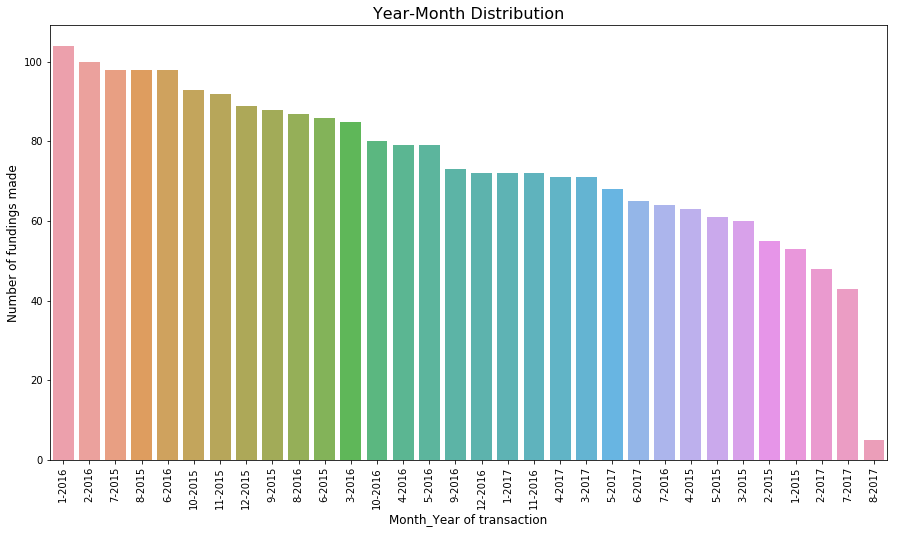

In [214]:
### Top 10 fundings
temp = data['Month_Year'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)

### Plotting counts of year_month column
Month_Year = data['Month_Year'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(Month_Year.index, Month_Year.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Month_Year of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

**Observations:**<br/>
From the above results, most no of investments or fundings happened on January 2016 and least was on August 2017.
Above visualization shows how funding varies from one month to another.

**Which Startup got Maximum Funding?**

In [215]:
print("Maximum funding to a Startups is : ",data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [216]:
data[data.AmountInUSD == 1400000000.0]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017,5,20,18,Thursday,3,138,5-2017,2
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,2017,3,12,21,Tuesday,1,80,3-2017,1


In [217]:
data[data.StartupName == 'Paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,2017,5,20,18,Thursday,3,138,5-2017,2
821,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,2016,8,35,30,Tuesday,1,243,8-2016,3
1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,2015,9,40,29,Tuesday,1,272,9-2015,3
2218,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,2015,3,11,13,Friday,4,72,3-2015,1
2276,2015-02-05,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,2015,2,6,5,Thursday,3,36,2-2015,1


In [218]:
data[data.StartupName == 'Flipkart']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
101,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,2017,6,26,26,Monday,0,177,6-2017,2
294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,2017,3,12,21,Tuesday,1,80,3-2017,1
360,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,2017,2,8,20,Monday,0,51,2-2017,1
2017,2015-06-04,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,2015,6,23,4,Thursday,3,155,6-2015,2


**Observations:** <br/>
As per above results, Paytm and Flipkart has got maximum funding of 1400000000.0 USD

**Which Startup has a least funding?**

In [219]:
print("Minimum funding to a Startups is : ",data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [220]:
data[data.AmountInUSD == 16000.0]

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015,1,4,19,Monday,0,19,1-2015,1
2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015,1,4,19,Monday,0,19,1-2015,1
2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015,1,4,19,Monday,0,19,1-2015,1
2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015,1,4,19,Monday,0,19,1-2015,1
2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,2015,1,4,19,Monday,0,19,1-2015,1


**Observations:**<br/>
Following Startups got minimum/least funding of $16000.0<br/>
Hostel Dunia<br/>
Play your sport<br/> Yo Grad<br/> Enabli<br/> CBS     
    

**What is the average funding of Indian Startups?**

In [221]:
print("On Average Indian startups got funding of : ",data["AmountInUSD"].dropna().sort_values().mean())

On Average Indian startups got funding of :  12031073.099016393


**What is the total number of Startups founded and which startups got maximum number of fundings?**

Total startups funded :  2001
Swiggy       7
UrbanClap    6
Medinfi      5
NoBroker     5
Paytm        5
Jugnoo       5
Ola Cabs     4
Flipkart     4
Tracxn       4
Moglix       4
Name: StartupName, dtype: int64


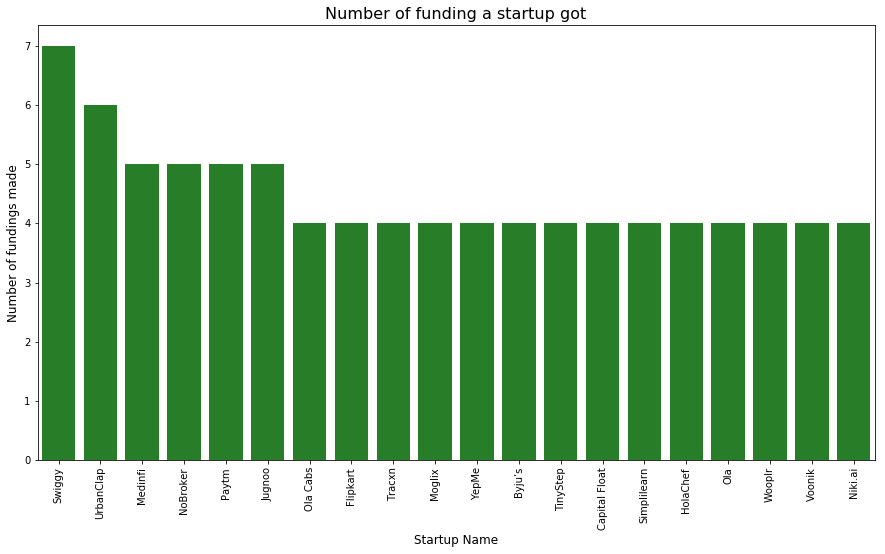

In [222]:
print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))

##visulization for Top 20 startups.
startupname = data['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color= 'Green')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

**Observations:**<br/>
As we can see that Swiggy got maximum number of fundings(Total funding = 7) and total there are 2001 Indian startups funded from January 2015 to August 2017. 

**Which industry has got maximum number of fundings?**

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64


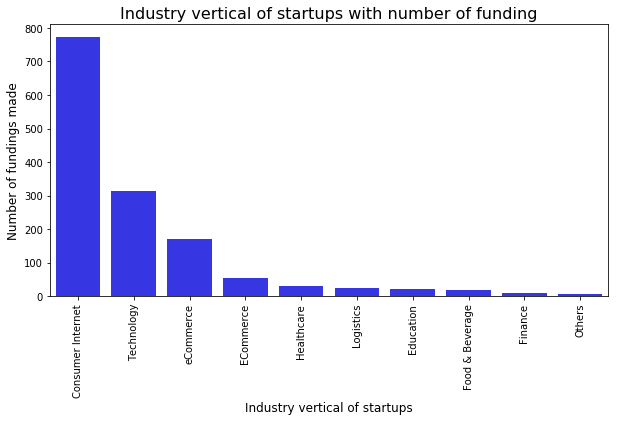

In [223]:
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(10,5))
sns.barplot(industry.index, industry.values, alpha=0.9, color='Blue')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

**Observations:**<br/>
If we see Above "Consumer Internet" got maximum number of funding = 772 followed by technology and E-Commerce.

**Subvertical of Startup**

Online Pharmacy             9
Food Delivery Platform      8
Online lending platform     5
Online Learning Platform    4
Online Payment Gateway      3
Data Analytics platform     3
ECommerce Marketplace       3
Fitness Mobile App          3
Cab Aggregation App         2
Online learning platform    2
Name: SubVertical, dtype: int64


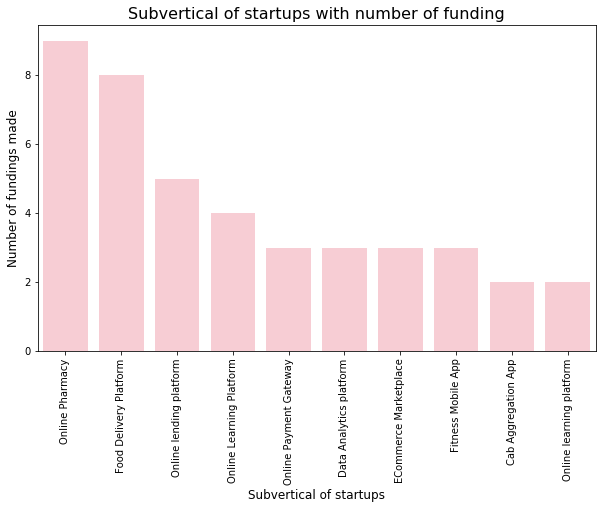

In [224]:
industry = data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(10,6))
sns.barplot(industry.index, industry.values, alpha=0.9, color='Pink')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

**Observations:**<br/>
"Online Pharmacy" Subvertical got maximum number of funding followed by "Food Delivery Platform"

**Distribution of investments count across different cities**

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


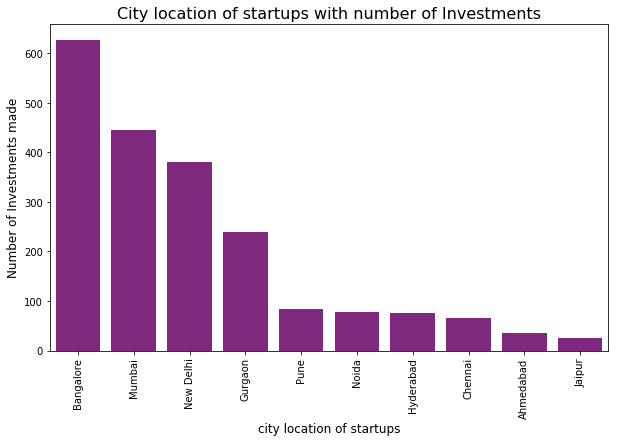

In [225]:
city = data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(10,6))
sns.barplot(city.index, city.values, alpha=0.9, color='Purple')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of Investments made', fontsize=12)
plt.title("City location of startups with number of Investments", fontsize=16)
plt.show()


**Observations:**<br/>
Do cities play a major role in funding ? (OR) Which city has maximum startups ? <br/>
We can see Bangalore attracts more number of investors followed by Mumbai and New Delhi

**When was funding declared**

Text(0.5,0,'Weekdays name of Declared Date')

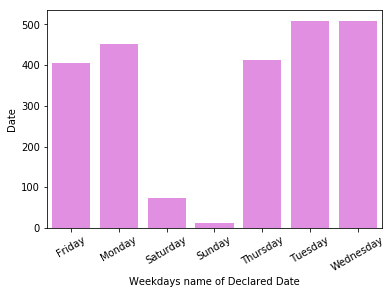

In [226]:
fund = data.groupby(['Date_Weekday_Name']).agg({'Date':'count'}).reset_index()
sns.barplot(x=fund.Date_Weekday_Name, y=fund.Date, color='violet')
plt.xticks(rotation=30);
plt.xlabel("Weekdays name of Declared Date")

**Observations:** <br/>
So most of the fundings declared on Tuesday and Wednesday.    

**Industry Vertical Vs AmountInUSD**

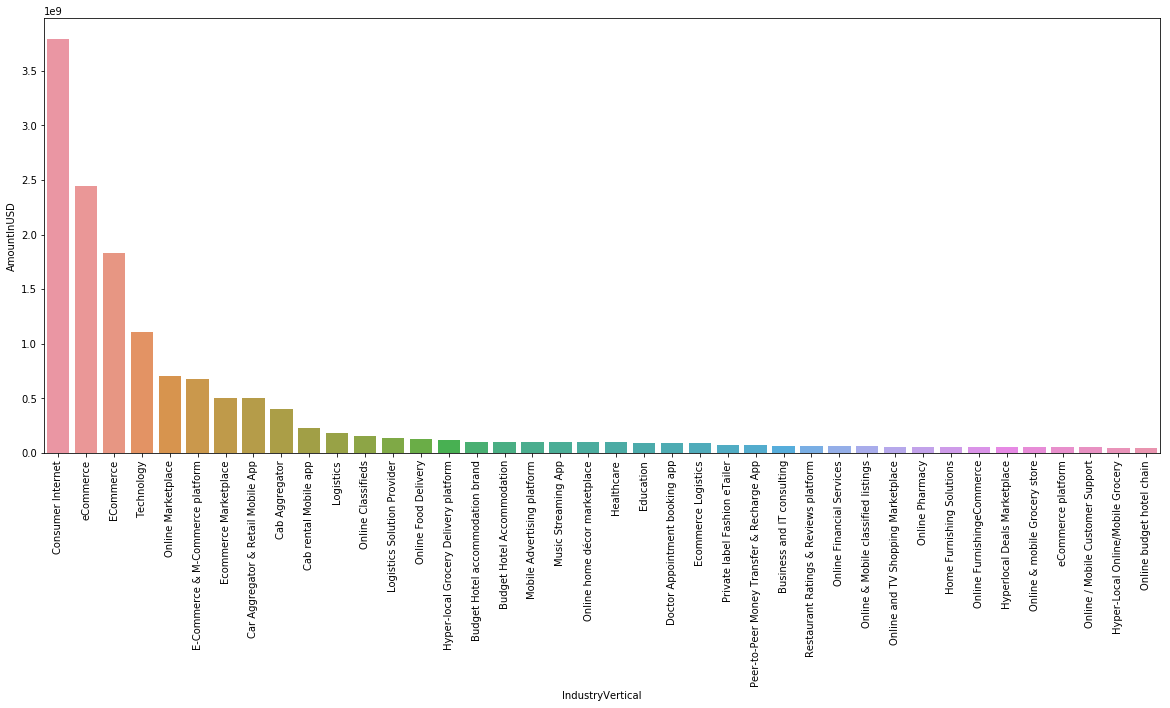

In [227]:
temp = data.groupby(['IndustryVertical']).agg({'AmountInUSD':'sum'}).reset_index()\
  .sort_values('AmountInUSD', ascending=False).reset_index(drop=True).iloc[:40, ]
    
plt.subplots(figsize=(20,8))
sns.barplot(x=temp.IndustryVertical, y=temp.AmountInUSD)
plt.xticks(rotation=90);

**Important investors**

Undisclosed Investors       33
Undisclosed investors       27
Indian Angel Network        24
Ratan Tata                  24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
RoundGlass Partners         10
Undisclosed Investor        10
Name: InvestorsName, dtype: int64


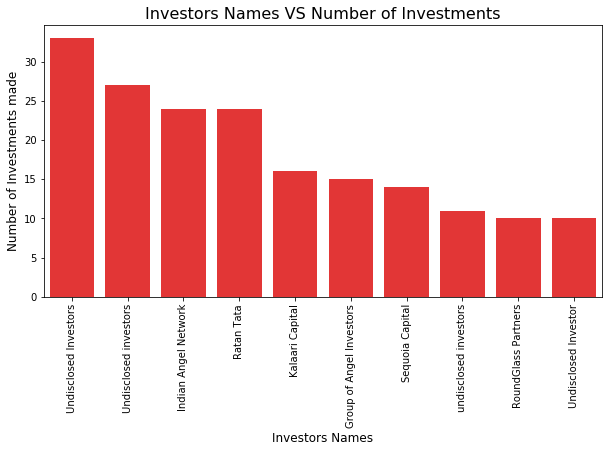

In [228]:
investors = data['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(10,5))
sns.barplot(investors.index, investors.values, alpha=0.9, color='Red')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of Investments made', fontsize=12)
plt.title("Investors Names VS Number of Investments", fontsize=16)
plt.show()

**Observations:** <br/>
Based on the above results, Top 2 investor names were not disclosed. Next to them Indian Angel Network and Ratan Tata are the top investors and the least investor is Brand Capital.

**Investment count over time**

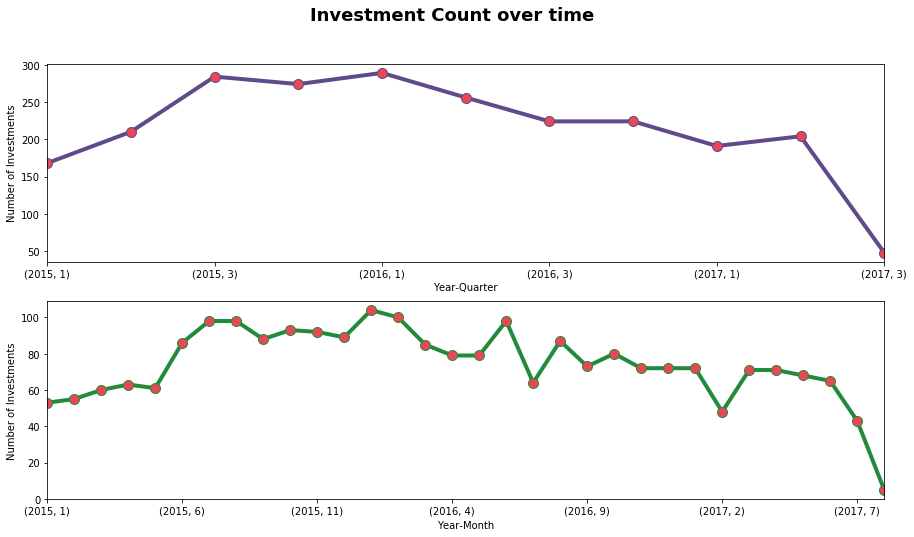

In [229]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Investment Count over time', fontsize=18, fontweight='bold')
ax = fig.add_subplot(211)
ts_quarter_count = data.groupby([data['Date'].dt.year, data['Date'].dt.quarter]).size()#['AmountInUSD']
ts_quarter_count.plot(linewidth=4, color='#5F4B8B',marker="o", markersize=10, markerfacecolor='#E84855')
plt.ylabel('Number of Investments')
plt.xlabel('Year-Quarter');


ax = fig.add_subplot(212)
ts_month_count = data.groupby([data['Date'].dt.year, data['Date'].dt.month]).size()#['AmountInUSD']
ts_month_count.plot(linewidth=4, color='#248A3B',marker="o", markersize=10, markerfacecolor='#E84855')
plt.ylabel('Number of Investments')
plt.xlabel('Year-Month');
# plt.

**Observations:**<br/>
If you compare both quarterly and monthly results, highest investment made in the Year 2016 January which was a 1st Quarter and least investments made in the Year 2017 July which was 3rd quarter of that year.

In [242]:
data.head(1)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Date_Year,Date_Month,Date_Week,Date_Day,Date_Weekday_Name,Date_Dayofweek,Date_Dayofyear,Month_Year,Date_quarter
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017,8,31,1,Tuesday,1,213,8-2017,3


In [243]:
t = data[['Date','AmountInUSD']]
t.dropna(inplace=True)
print(t.dtypes)

Date           datetime64[ns]
AmountInUSD           float64
dtype: object


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [266]:
ts=t.set_index(t.Date)

**Note:** In order to set Date column as index and AmountInUSD as one column.

In [267]:
ts.head()

,Date,AmountInUSD
Date,,
2017-08-01,2017-08-01,1300000.0
2017-08-02,2017-08-02,500000.0
2017-08-02,2017-08-02,850000.0
2017-07-01,2017-07-01,1000000.0
2017-07-03,2017-07-03,2600000.0


In [269]:
del ts['Date']

**Note:** Dropped Date column

In [270]:
ts.head()

,AmountInUSD
Date,
2017-08-01,1300000.0
2017-08-02,500000.0
2017-08-02,850000.0
2017-07-01,1000000.0
2017-07-03,2600000.0


In [271]:
ts.index

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-02', '2017-07-01',
               '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-05',
               '2017-07-05', '2017-07-07',
               ...
               '2015-01-22', '2015-01-22', '2015-01-24', '2015-01-25',
               '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-29',
               '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', name='Date', length=1525, freq=None)

In [322]:
ts2=ts.iloc[0:20,:]
print(len(ts2))

20


In [323]:
ts2.head()

,AmountInUSD
Date,
2017-08-01,1300000.0
2017-08-02,500000.0
2017-08-02,850000.0
2017-07-01,1000000.0
2017-07-03,2600000.0


In [324]:
ts1 = ts['AmountInUSD'] 
ts1.head(10)

Date
2017-08-01     1300000.0
2017-08-02      500000.0
2017-08-02      850000.0
2017-07-01     1000000.0
2017-07-03     2600000.0
2017-07-04    20000000.0
2017-07-05     8500000.0
2017-07-05    12000000.0
2017-07-05     1000000.0
2017-07-07     1000000.0
Name: AmountInUSD, dtype: float64

Cross-checking the datatype of the index with the above command.

In [276]:
#1. Specific the index as a string constant:
ts1['2017-08-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts1[datetime(2017,8,1)]

1300000.0

Lets move onto the ways of testing stationarity. First and foremost is to simply plot the data and analyze visually.

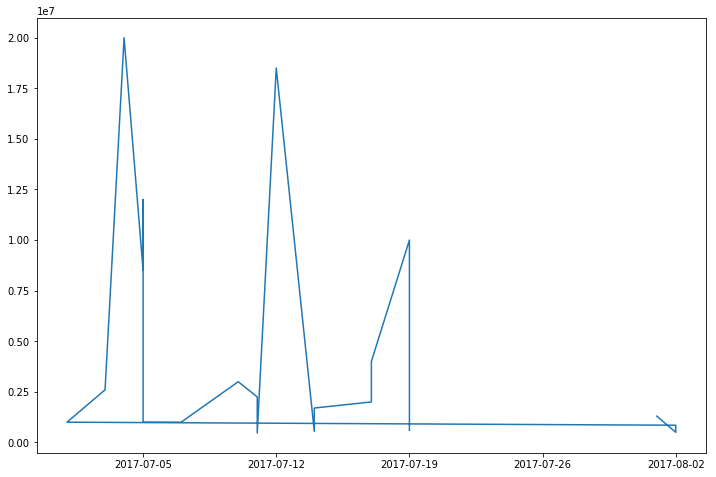

In [325]:
from matplotlib import pyplot
plt.figure(figsize=(12,8))
#ts1.plot()
plt.plot(ts2)
pyplot.show()

**Observations:** It is clearly evident that there is an increasing trend in the data along with some seasonal variations. 

**We can check stationarity by Dickey-Fuller Test: <br/>**
This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [296]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


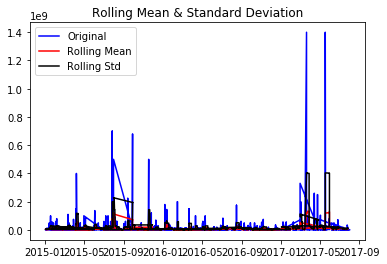

Results of Dickey-Fuller Test:
Test Statistic                  -38.609554
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1524.000000
Critical Value (1%)              -3.434648
Critical Value (5%)              -2.863438
Critical Value (10%)             -2.567781
dtype: float64


In [297]:
test_stationarity(ts1)

**Observations:** The Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence.

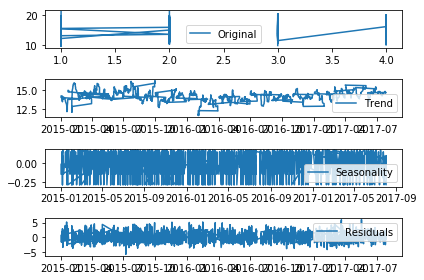

In [308]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model = 'additive', freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


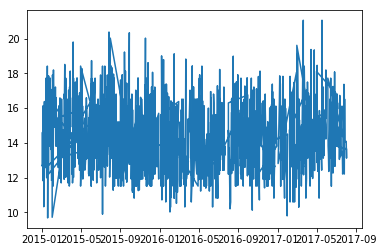

In [304]:
ts1_log = np.log(ts1)
plt.plot(ts1_log)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


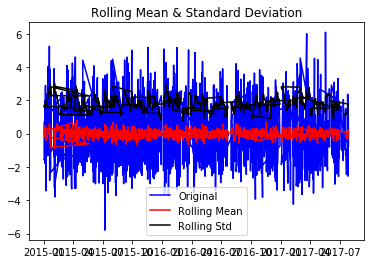

Results of Dickey-Fuller Test:
Test Statistic                -1.493799e+01
p-value                        1.335664e-27
#Lags Used                     2.400000e+01
Number of Observations Used    1.488000e+03
Critical Value (1%)           -3.434752e+00
Critical Value (5%)           -2.863484e+00
Critical Value (10%)          -2.567805e+00
dtype: float64


In [309]:
ts1decompose = residual
ts1decompose.dropna(inplace=True)
test_stationarity(ts1decompose)

In [2]:
from datetime import datetime,datetime
date1= datetime(1985, 6, 23, 5, 23,23)
print(date1.day)

23
